In [1]:
import torch as tch
import numpy as np
import random
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pickle


import loader
import DataTools

In [3]:
# Data
dataDir = '/usr/sci/cibc/Maprodxn/ClinicalECGData/LVEFCohort/pythonData/'
with open('patient_splits/pre_train_patients.pkl', 'rb') as file:
    pre_train_patients = pickle.load(file)

dataset = DataTools.ECGDatasetLoader(baseDir=dataDir,patients=pre_train_patients[:100].tolist(), normalize=False)

In [4]:
def visualizeLeads(data, text, original_ecg=None):
  
  x = list(range(data.shape[-1]))
  if original_ecg is not None:
    fig, axs = plt.subplots(8, 2, figsize=(2*30, 2*8*2.5))
  else:
    fig, axs = plt.subplots(8, figsize=(2*15, 2*8*2.5))
  fig.suptitle(f'{text}', fontsize=60, y=0.92)
  for lead in range(8):
      y = list(data[lead, :])
      if original_ecg is not None:
        axs[lead, 0].plot(x,y,linewidth=2)
        axs[lead, 0].set(xlabel=f'Lead {lead} ')
        axs[lead, 0].xaxis.label.set_visible(True)

        y = list(original_ecg[lead, :])
        axs[lead, 1].plot(list(range(original_ecg.shape[-1])), y, linewidth=2)
        axs[lead, 1].set(xlabel=f'Lead {lead}')
        axs[lead, 1].xaxis.label.set_visible(True)
      else:
        axs[lead].plot(x,y,linewidth=2)
        axs[lead].set(xlabel=f'Lead {lead} ')
        axs[lead].xaxis.label.set_visible(True)

  plt.subplots_adjust(hspace=0.4, wspace=0.2)
  return fig


def visualizeLeads_comp(data, text, original_ecg):
  
  fig, axs = plt.subplots(8, figsize=(4*15, 4*8*2.5))
  fig.suptitle(f'{text}', fontsize=50, y=0.92)
  pad_size = (original_ecg.shape[-1] - data.shape[-1])//2
  if pad_size != 0:
      pad = tch.full((8, pad_size), float('nan'))
      data = tch.cat((pad, data, pad), dim=1)
  
  for lead in range(8):
        y = list(data[lead, :])
        axs[lead].plot(list(range(data.shape[-1])),y,linewidth=2, color='red')
        

        y = list(original_ecg[lead, :])
        axs[lead].plot(list(range(original_ecg.shape[-1])), y, linewidth=1, color='blue', linestyle=":")
        axs[lead].set_xlabel(f'Lead {lead}',fontsize=30)
        axs[lead].xaxis.label.set_visible(True)

        axs[lead].tick_params(axis='x', labelsize=30)  # For x-axis
        axs[lead].tick_params(axis='y', labelsize=30)  # For y-axis
      

  plt.subplots_adjust(hspace=0.4, wspace=0.2)
  return fig

In [5]:
data = dataset[50]
ecg = data[0][0]
print(data[1], ecg.shape)

tensor(64.2000) torch.Size([8, 5000])


In [33]:
augmentation = [loader.MagnitudeWarping(knots=knot, sigma=std)]
augmentation_name = str(augmentation[0].__class__.__name__)
augs = loader.TwoCropsTransform(transforms.Compose(augmentation))

ecg = data[0][0]
mod = augs(ecg)
sig = mod[0][0]

sig.dtype

torch.float64

torch.Size([8, 5000])


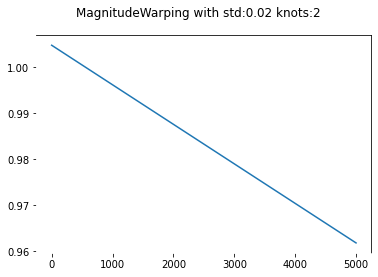

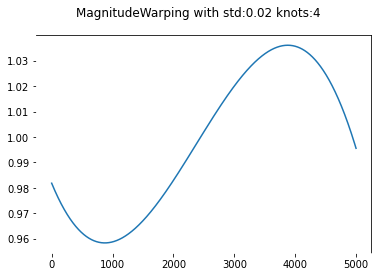

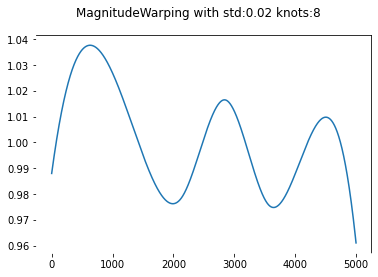

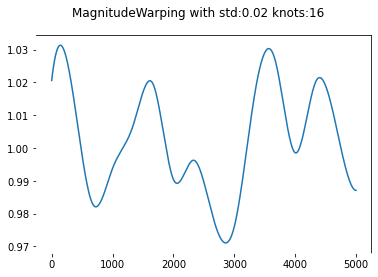

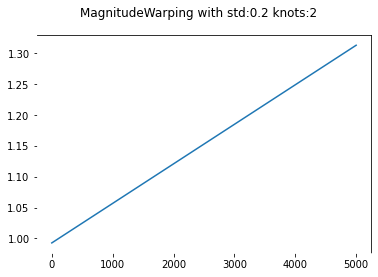

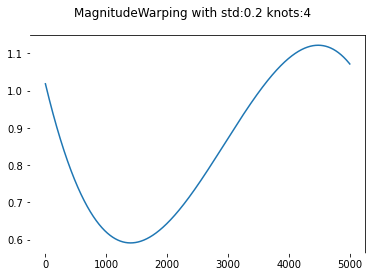

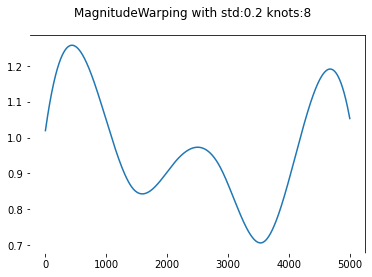

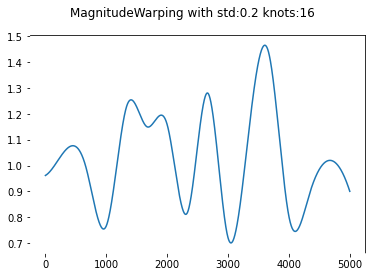

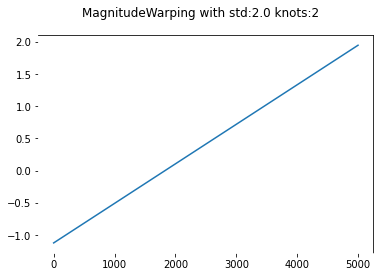

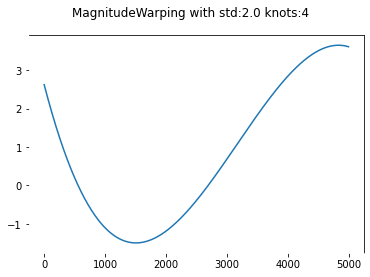

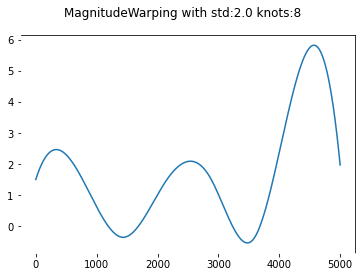

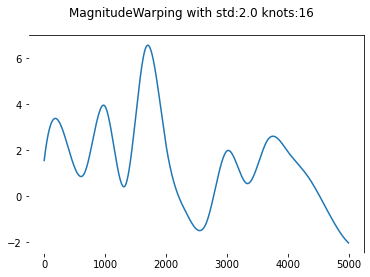

In [10]:
# Magnitude Warping
np.random.seed(42)
magnitude_warping = loader.MagnitudeWarping
r = magnitude_warping(knots=10, sigma=0.2)

sigma = [0.02, 0.2, 2.0]
knots = [2, 4, 8, 16]
augmentation_list = []
for std in sigma:
    for knot in knots:
        augmentation = [loader.MagnitudeWarping(knots=knot, sigma=std)]
        augmentation_name = str(augmentation[0].__class__.__name__)
        augs = loader.TwoCropsTransform(transforms.Compose(augmentation))

        ecg = data[0][0]
        mod = augs(ecg)
        sig = mod[0][0]

        fig, axs = plt.subplots()
        axs.plot(augmentation[0].warping)
        axs.spines['bottom'].set_color('white') 
        axs.spines['left'].set_color('white')
        fig.suptitle(f"{augmentation_name} with std:{std} knots:{knot}")
        plt.show()

        # temp = visualizeLeads_comp(sig, f"RED: Added {augmentation_name}, BLUE: Original ECG", ecg)

